<a href="https://colab.research.google.com/github/LiliyaPonomareva/Investment-Portfolio-Management/blob/main/LSTM_GRU_portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install apimoex
import apimoex as moex
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import time

In [2]:
tickers = ['ZILL', 'PLZL', 'MGNT', 'PHOR', 'PIKK', 'YNDX', 'CHMF', 'LKOH', 'TATN', 'NVTK',
           'ENPG', 'BSPB', 'OZON', 'SELG', 'IRAO', 'SFIN', 'CBOM', 'AKRN', 'LNZL', 'LSRG']

In [3]:
stocks_df = pd.DataFrame(columns=tickers)
with requests.Session() as session:
  for ticker in tickers:
    data = moex.get_board_history(session, ticker, start='2022-04-01', end='2025-03-31', board='TQBR')
    if data == []:
        continue
    df = pd.DataFrame(data)
    df = df[['TRADEDATE','CLOSE']]
    df = df.rename(columns={'CLOSE': ticker})
    stocks_df = stocks_df.combine_first(df)
stocks_df

,AKRN,BSPB,CBOM,CHMF,ENPG,IRAO,LKOH,LNZL,LSRG,MGNT,...,OZON,PHOR,PIKK,PLZL,SELG,SFIN,TATN,TRADEDATE,YNDX,ZILL
0,21190.0,64.39,5.830,1192.6,787.00,2.8800,5601.0,10650.0,588.0,4220.0,...,1418.0,7400.0,672.1,12500.0,47.99,470.0,407.2,2022-04-01,2325.0,3110
1,21012.0,67.98,5.844,1185.0,799.50,2.8625,5557.0,10350.0,581.0,4273.5,...,1397.0,7129.0,648.1,12950.5,48.02,461.4,407.0,2022-04-04,2285.0,3200
2,19410.0,62.21,5.609,1093.0,781.00,2.7050,5314.0,10000.0,550.6,4098.0,...,1298.0,6881.0,589.0,13512.0,46.51,467.6,395.0,2022-04-05,2158.4,3185
3,21990.0,61.11,5.598,1061.8,788.00,2.6385,5266.0,9950.0,543.8,4120.0,...,1215.0,7380.0,567.1,13450.0,46.30,454.4,393.0,2022-04-06,2070.8,3105
4,20910.0,62.50,5.630,1066.0,779.00,2.6750,5280.0,9880.0,547.4,4247.0,...,1219.5,7286.0,614.3,13975.0,46.65,450.0,391.0,2022-04-07,2130.0,3080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,17814.0,406.98,9.987,1279.6,564.95,3.7405,7265.0,13760.0,886.0,4677.5,...,3920.0,6947.0,563.7,NaN,51.13,1579.4,697.9,2025-03-25,NaN,3995
757,17000.0,404.00,9.875,1245.8,547.95,3.7190,7185.0,13820.0,885.8,4618.0,...,3875.0,6796.0,549.9,NaN,50.20,1549.2,684.5,2025-03-26,NaN,4200
758,16634.0,395.00,9.327,1199.2,526.45,3.6800,7108.5,13550.0,864.2,4520.0,...,3762.0,6630.0,525.7,1867.6,49.97,1503.6,675.9,2025-03-27,NaN,4000
759,16282.0,398.42,9.360,1153.2,510.20,3.6380,7064.5,13600.0,866.8,4421.5,...,3538.5,6501.0,513.6,1880.0,50.84,1446.0,687.6,2025-03-28,NaN,3925


In [4]:
stocks_df.index = pd.to_datetime(stocks_df.TRADEDATE)
stocks_df.drop('TRADEDATE', axis=1, inplace=True)
stocks_df

,AKRN,BSPB,CBOM,CHMF,ENPG,IRAO,LKOH,LNZL,LSRG,MGNT,NVTK,OZON,PHOR,PIKK,PLZL,SELG,SFIN,TATN,YNDX,ZILL
TRADEDATE,,,,,,,,,,,,,,,,,,,,
2022-04-01,21190.0,64.39,5.830,1192.6,787.00,2.8800,5601.0,10650.0,588.0,4220.0,1390.0,1418.0,7400.0,672.1,12500.0,47.99,470.0,407.2,2325.0,3110
2022-04-04,21012.0,67.98,5.844,1185.0,799.50,2.8625,5557.0,10350.0,581.0,4273.5,1389.2,1397.0,7129.0,648.1,12950.5,48.02,461.4,407.0,2285.0,3200
2022-04-05,19410.0,62.21,5.609,1093.0,781.00,2.7050,5314.0,10000.0,550.6,4098.0,1298.0,1298.0,6881.0,589.0,13512.0,46.51,467.6,395.0,2158.4,3185
2022-04-06,21990.0,61.11,5.598,1061.8,788.00,2.6385,5266.0,9950.0,543.8,4120.0,1264.0,1215.0,7380.0,567.1,13450.0,46.30,454.4,393.0,2070.8,3105
2022-04-07,20910.0,62.50,5.630,1066.0,779.00,2.6750,5280.0,9880.0,547.4,4247.0,1263.0,1219.5,7286.0,614.3,13975.0,46.65,450.0,391.0,2130.0,3080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,17814.0,406.98,9.987,1279.6,564.95,3.7405,7265.0,13760.0,886.0,4677.5,1315.8,3920.0,6947.0,563.7,NaN,51.13,1579.4,697.9,NaN,3995
2025-03-26,17000.0,404.00,9.875,1245.8,547.95,3.7190,7185.0,13820.0,885.8,4618.0,1286.8,3875.0,6796.0,549.9,NaN,50.20,1549.2,684.5,NaN,4200
2025-03-27,16634.0,395.00,9.327,1199.2,526.45,3.6800,7108.5,13550.0,864.2,4520.0,1277.6,3762.0,6630.0,525.7,1867.6,49.97,1503.6,675.9,NaN,4000


У некоторых акций есть пропущенные значения, например, у Яндекса (YNDX) из-за реструктуризации компании в некоторый период и смены тикера

In [5]:
with pd.option_context('display.max_rows', None):
    display(stocks_df.isnull().sum())

,0
AKRN,0
BSPB,0
CBOM,0
CHMF,0
ENPG,0
IRAO,0
LKOH,0
LNZL,0
LSRG,0
MGNT,0


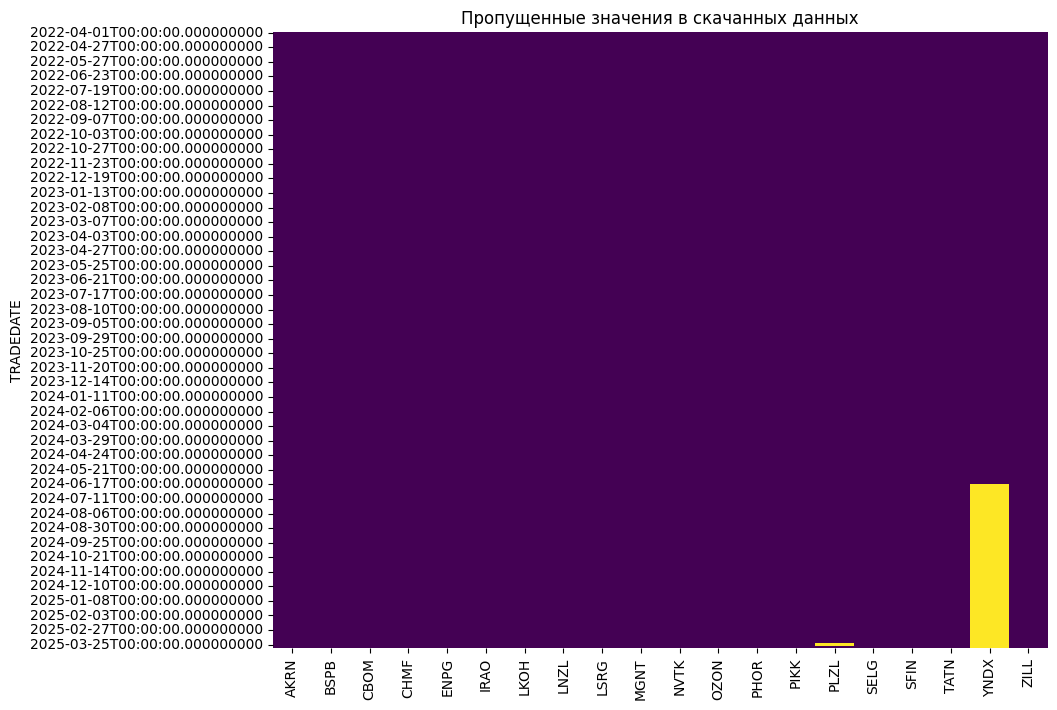

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,8))
sns_heatmap = sns.heatmap(stocks_df.isnull(), cbar=False, cmap='viridis') # Визуализируем пропуски
plt.title('Пропущенные значения в скачанных данных')
plt.show()

In [8]:
stocks_df['YNDX'][555:560]

,YNDX
TRADEDATE,
2024-06-11,4102.0
2024-06-13,4048.0
2024-06-14,4071.2
2024-06-17,NaN
2024-06-18,NaN


In [9]:
# получение цен акций Яндекса с новым тикером
yandex = moex.get_board_history(requests.Session(), 'YDEX', start='2024-07-24', end='2025-03-31', board='TQBR')
y = []
for d in yandex:
  y.append(d.get('CLOSE'))

stocks_df.loc['2024-07-24':'2025-03-31', 'YNDX'] = y
stocks_df['YNDX']

,YNDX
TRADEDATE,
2022-04-01,2325.0
2022-04-04,2285.0
2022-04-05,2158.4
2022-04-06,2070.8
2022-04-07,2130.0
...,...
2025-03-25,4646.5
2025-03-26,4567.5
2025-03-27,4446.0


In [10]:
print('Недостающие значения Яндекс')
stocks_df['YNDX']['2024-06-14':'2024-07-24']

Недостающие значения Яндекс


,YNDX
TRADEDATE,
2024-06-14,4071.2
2024-06-17,NaN
2024-06-18,NaN
2024-06-19,NaN
2024-06-20,NaN
2024-06-21,NaN
2024-06-24,NaN
2024-06-25,NaN
2024-06-26,NaN


Добавим недостающие значения, как равномерно увеличивающуюся последовательность от 4071.2 до 4148.5

In [11]:
difference = stocks_df['YNDX']['2024-07-24'] - stocks_df['YNDX']['2024-06-14']
n = len(stocks_df['YNDX']['2024-06-17':'2024-07-23'])
start = stocks_df['YNDX']['2024-06-14'] + difference/(n + 1)
mas = [start]
for _ in range(n - 1):
  start += difference/(n + 1)
  mas.append(start)
stocks_df.loc['2024-06-17':'2024-07-23', 'YNDX'] = mas
stocks_df['YNDX']['2024-06-17':'2024-07-24']

,YNDX
TRADEDATE,
2024-06-17,4073.960714
2024-06-18,4076.721429
2024-06-19,4079.482143
2024-06-20,4082.242857
2024-06-21,4085.003571
2024-06-24,4087.764286
2024-06-25,4090.525000
2024-06-26,4093.285714
2024-06-27,4096.046429


Сделаем тоже самое для акций Полюса, но нужно также будет пересчитать цены, т.к. в эти пропущенные дни прошел сплит акций 1 к 10.

In [12]:
stocks_df.loc['2025-03-24':'2025-03-31', 'PLZL'] *= 10
stocks_df['PLZL']['2025-03-21':'2025-03-31']

,PLZL
TRADEDATE,
2025-03-21,19017.0
2025-03-24,NaN
2025-03-25,NaN
2025-03-26,NaN
2025-03-27,18676.0
2025-03-28,18800.0
2025-03-31,18636.0


In [13]:
difference = stocks_df['PLZL']['2025-03-27'] - stocks_df['PLZL']['2025-03-21']
n = len(stocks_df['PLZL']['2025-03-24':'2025-03-26'])
start = stocks_df['PLZL']['2025-03-21'] + difference/(n + 1)
mas = [start]
for _ in range(n - 1):
  start += difference/(n + 1)
  mas.append(start)
stocks_df.loc['2025-03-24':'2025-03-26', 'PLZL'] = mas
stocks_df['PLZL']['2025-03-24':'2025-03-26']

,PLZL
TRADEDATE,
2025-03-24,18931.75
2025-03-25,18846.50
2025-03-26,18761.25


Описательная статистика

In [14]:
stocks_df.describe()

,AKRN,BSPB,CBOM,CHMF,ENPG,IRAO,LKOH,LNZL,LSRG,MGNT,NVTK,OZON,PHOR,PIKK,PLZL,SELG,SFIN,TATN,YNDX
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,17604.614980,228.970039,6.995694,1201.391064,447.782917,3.724252,5894.680683,14207.385020,677.696189,5425.843627,1191.882523,2494.521025,6667.074901,690.729435,11408.911958,55.520039,865.240736,538.967280,2850.240145
std,1385.408574,116.018636,1.203002,328.118031,87.794064,0.470754,1383.167643,2977.612806,160.521375,1098.256394,236.979512,1050.081030,725.975504,117.010871,2960.931762,13.177617,458.760639,138.214306,946.562060
min,13500.000000,53.440000,4.470000,572.600000,278.400000,2.375000,3539.500000,7120.000000,410.200000,4000.000000,767.200000,771.000000,4866.000000,356.300000,5018.000000,34.170000,425.800000,312.600000,1386.000000
25%,16720.000000,100.070000,6.236000,988.600000,391.500000,3.412000,4519.000000,12140.000000,517.600000,4585.500000,1010.200000,1498.000000,6333.000000,614.000000,9449.000000,45.800000,500.000000,393.000000,1998.000000
50%,17796.000000,250.500000,6.955000,1213.000000,442.600000,3.817500,6447.000000,14800.000000,691.800000,5007.000000,1105.000000,2668.500000,6751.000000,691.500000,11390.000000,50.530000,542.800000,574.100000,2571.600000
75%,18850.000000,339.920000,7.608000,1372.200000,493.000000,4.082000,7120.000000,16220.000000,770.000000,5913.000000,1346.400000,3290.000000,7211.000000,770.900000,13130.000000,66.860000,1351.600000,667.900000,3872.500000
max,21990.000000,409.760000,10.623000,2006.000000,799.500000,4.543500,8152.000000,24700.000000,1148.000000,8444.000000,1756.200000,4673.000000,8153.000000,955.500000,19702.500000,91.200000,1975.000000,764.300000,4709.000000


In [15]:
num_assets = stocks_df.shape[1]

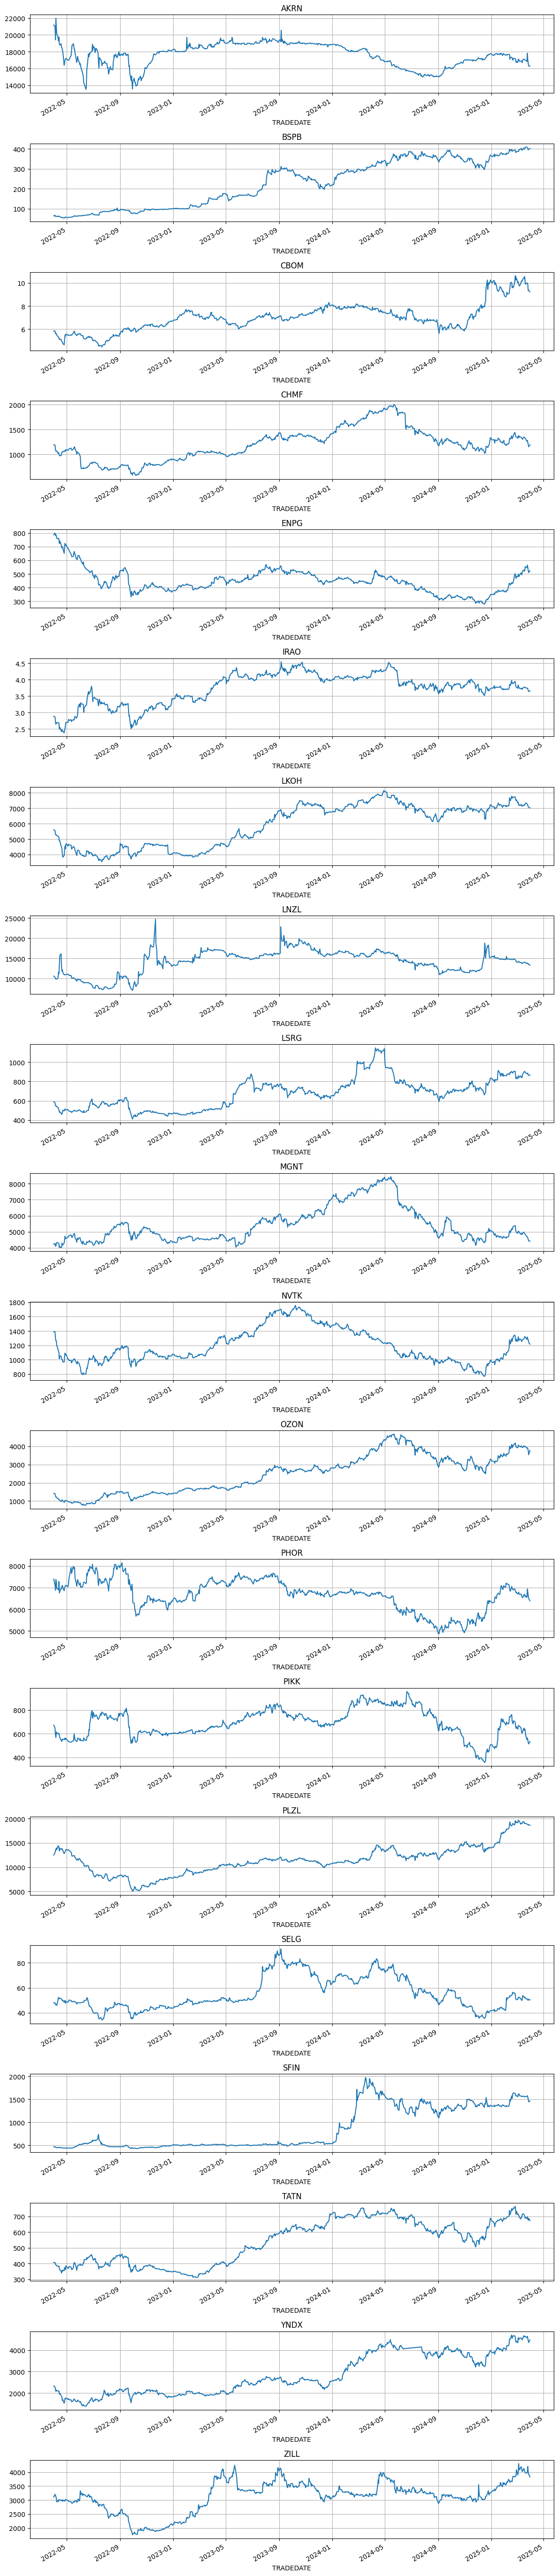

In [16]:
fig, ax = plt.subplots(num_assets, 1, figsize=(12, 55))
cols = stocks_df.columns

for col, row in zip(cols, ax):
  stocks_df[col].plot(ax=row, title=col)
  row.grid()

plt.tight_layout()
plt.show()

In [17]:
d_returns = stocks_df.pct_change().dropna()
display(d_returns)

<ipython-input-17-20fb532dd12d>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d_returns = stocks_df.pct_change().dropna()


,AKRN,BSPB,CBOM,CHMF,ENPG,IRAO,LKOH,LNZL,LSRG,MGNT,NVTK,OZON,PHOR,PIKK,PLZL,SELG,SFIN,TATN,YNDX,ZILL
TRADEDATE,,,,,,,,,,,,,,,,,,,,
2022-04-04,-0.008400,0.055754,0.002401,-0.006373,0.015883,-0.006076,-0.007856,-0.028169,-0.011905,0.012678,-0.000576,-0.014810,-0.036622,-0.035709,0.036040,0.000625,-0.018298,-0.000491,-0.017204,0.028939
2022-04-05,-0.076242,-0.084878,-0.040212,-0.077637,-0.023139,-0.055022,-0.043729,-0.033816,-0.052324,-0.041067,-0.065649,-0.070866,-0.034787,-0.091190,0.043357,-0.031445,0.013437,-0.029484,-0.055405,-0.004687
2022-04-06,0.132921,-0.017682,-0.001961,-0.028545,0.008963,-0.024584,-0.009033,-0.005000,-0.012350,0.005368,-0.026194,-0.063945,0.072519,-0.037182,-0.004589,-0.004515,-0.028229,-0.005063,-0.040586,-0.025118
2022-04-07,-0.049113,0.022746,0.005716,0.003956,-0.011421,0.013834,0.002659,-0.007035,0.006620,0.030825,-0.000791,0.003704,-0.012737,0.083230,0.039033,0.007559,-0.009683,-0.005089,0.028588,-0.008052
2022-04-08,-0.035868,-0.004960,-0.028597,0.001689,-0.022465,0.007664,-0.010133,0.002024,-0.017172,0.020721,-0.049406,-0.034850,-0.044743,-0.023279,-0.024258,-0.015005,0.000889,-0.012788,-0.007042,-0.048701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,0.058467,-0.003721,-0.001799,0.015717,0.032532,0.000267,-0.003566,-0.007215,0.006818,-0.002453,0.025245,0.005644,0.060773,0.026215,-0.004503,0.002156,0.007270,0.016458,0.013524,0.007566
2025-03-26,-0.045694,-0.007322,-0.011215,-0.026415,-0.030091,-0.005748,-0.011012,0.004360,-0.000226,-0.012720,-0.022040,-0.011480,-0.021736,-0.024481,-0.004523,-0.018189,-0.019121,-0.019200,-0.017002,0.051314
2025-03-27,-0.021529,-0.022277,-0.055494,-0.037406,-0.039237,-0.010487,-0.010647,-0.019537,-0.024385,-0.021221,-0.007150,-0.029161,-0.024426,-0.044008,-0.004544,-0.004582,-0.029435,-0.012564,-0.026601,-0.047619


Посчитаем ежедневную доходность

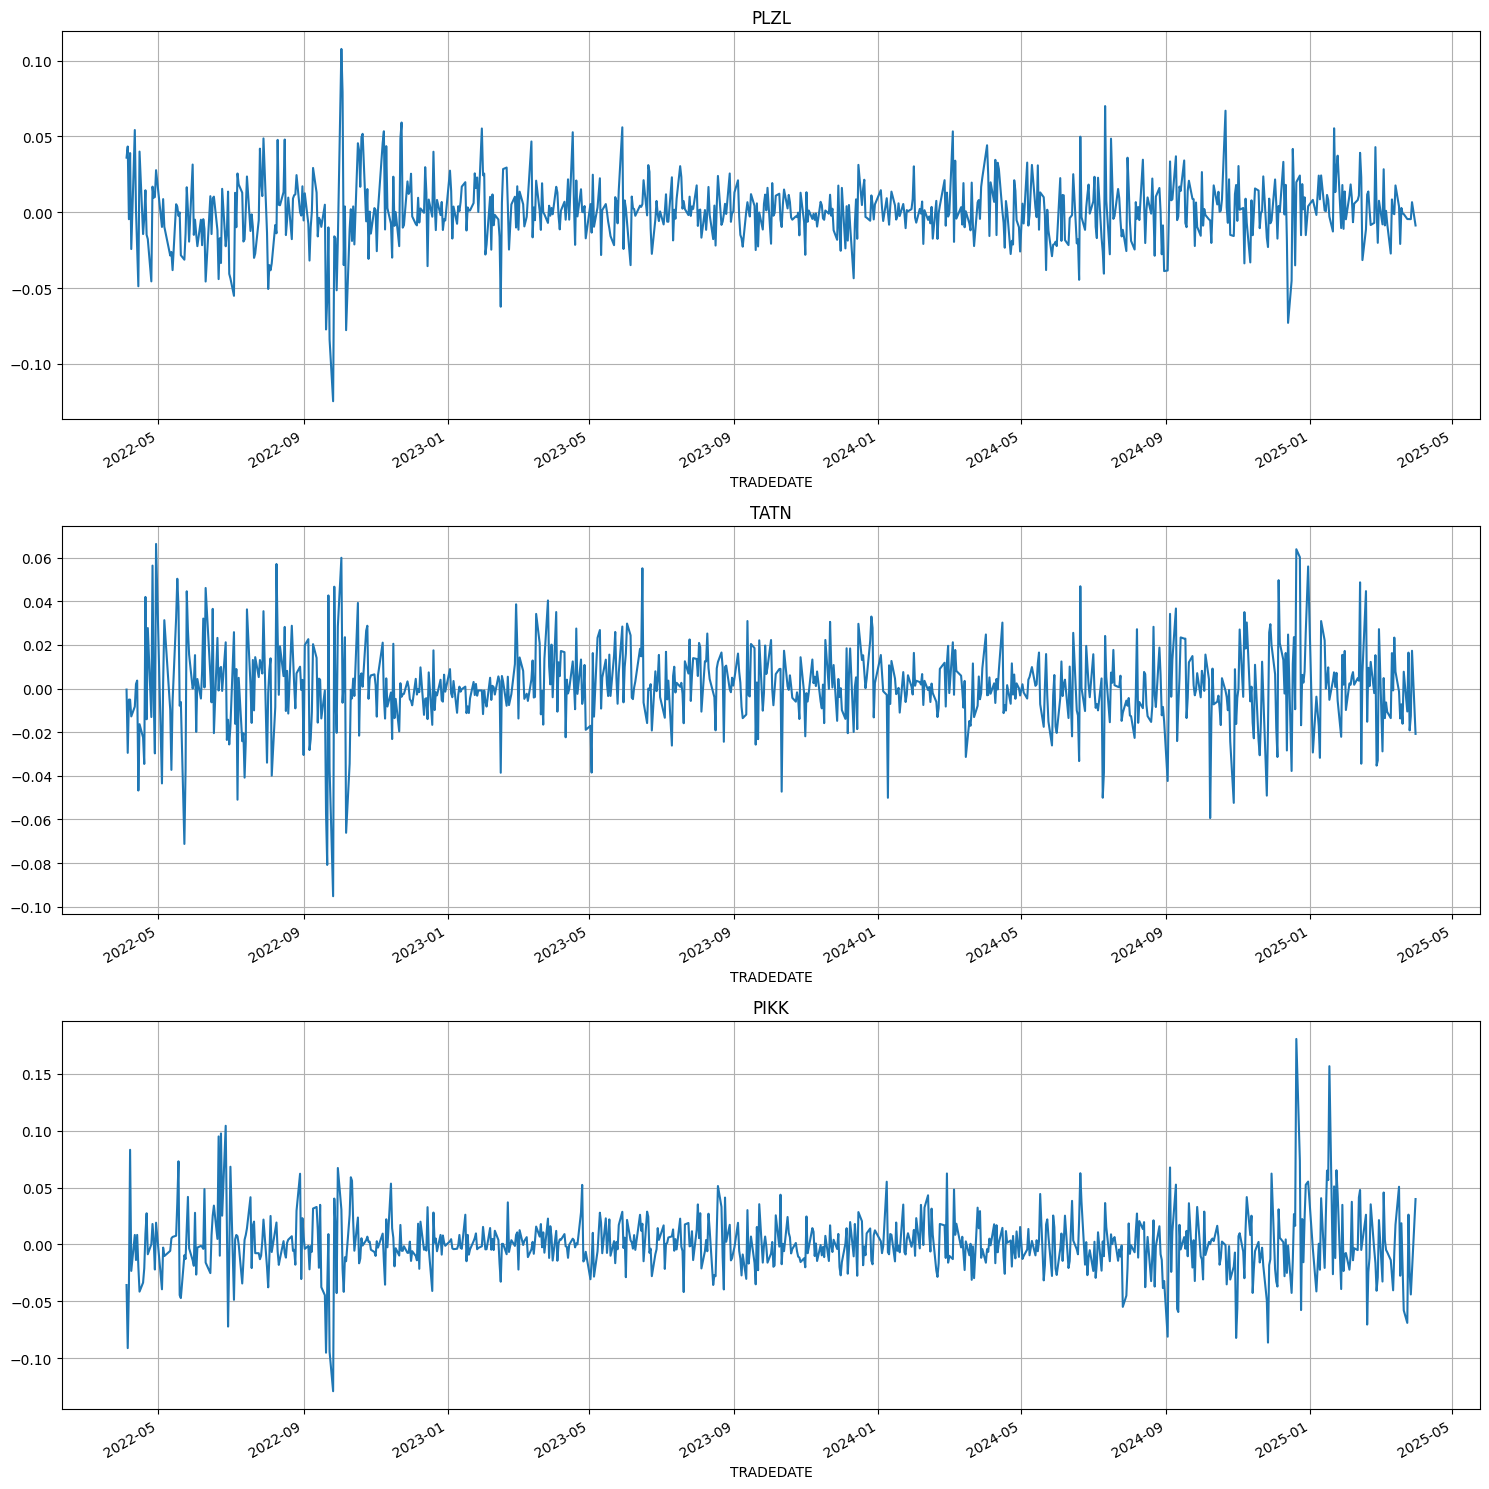

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
cols = ['PLZL', 'TATN', 'PIKK']

for col, row in zip(cols, ax):
  d_returns[col].plot(ax=row, title=col)
  row.grid()

plt.tight_layout()
plt.show()

Вычислим действительные доходности за месяц (около 22 рабочих дней)

In [19]:
period = 22
m_returns = stocks_df.pct_change(periods=period)
m_returns

<ipython-input-19-ddffd8867782>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m_returns = stocks_df.pct_change(periods=period)


,AKRN,BSPB,CBOM,CHMF,ENPG,IRAO,LKOH,LNZL,LSRG,MGNT,NVTK,OZON,PHOR,PIKK,PLZL,SELG,SFIN,TATN,YNDX,ZILL
TRADEDATE,,,,,,,,,,,,,,,,,,,,
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,0.035698,0.041402,0.036426,-0.076634,0.267272,-0.037318,-0.057656,-0.072151,-0.019043,-0.124064,-0.007992,-0.039451,0.002598,-0.202687,-0.000133,-0.080396,-0.033888,-0.074894,-0.004393,0.040365
2025-03-26,-0.011628,0.022448,-0.018585,-0.136181,0.106970,-0.055972,-0.071405,-0.066847,-0.021215,-0.139236,-0.041704,-0.057178,-0.021595,-0.218559,0.002364,-0.101164,-0.054212,-0.090728,-0.022158,0.096606
2025-03-27,-0.031781,0.004246,-0.117597,-0.153227,0.048705,-0.065990,-0.080282,-0.078231,-0.045926,-0.160553,-0.037807,-0.102469,-0.035215,-0.240537,-0.043287,-0.088471,-0.077206,-0.115661,-0.038391,0.037613


Вычислим среднемесячные доходности


In [21]:
stocks_df['month_year'] = stocks_df.index.to_period('M')
mean_m_returns = stocks_df.groupby(['month_year']).mean().pct_change().dropna()
mean_m_returns

<ipython-input-21-5b9895feb66c>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mean_m_returns = stocks_df.groupby(['month_year']).mean().pct_change().dropna()


,AKRN,BSPB,CBOM,CHMF,ENPG,IRAO,LKOH,LNZL,LSRG,MGNT,NVTK,OZON,PHOR,PIKK,PLZL,SELG,SFIN,TATN,YNDX,ZILL
month_year,,,,,,,,,,,,,,,,,,,,
2022-05,-0.073113,0.033528,0.054591,0.019614,-0.128621,0.107022,-0.089720,-0.121041,-0.034825,0.095336,-0.128096,-0.156540,0.060912,-0.055236,-0.090990,-0.013946,0.039377,0.018709,-0.145358,-0.022689
2022-06,-0.065457,0.126693,-0.049773,-0.279901,-0.148288,0.182032,-0.072536,-0.118264,0.053779,-0.069541,-0.068524,-0.090834,0.005305,0.122847,-0.173466,-0.030437,0.171834,0.112887,-0.066199,0.066609
2022-07,0.054357,0.114518,-0.105753,-0.020656,-0.188357,-0.019398,-0.063777,-0.128440,0.071924,0.009419,0.073989,0.338038,-0.008174,0.227532,-0.195349,-0.195533,0.060404,-0.069378,0.144955,-0.097474
2022-08,-0.030329,0.178145,0.122223,-0.064136,0.021911,-0.070223,0.047518,0.106983,0.017191,0.176735,0.101435,0.230055,0.021669,-0.026222,-0.046243,0.186086,-0.187455,0.076399,0.131109,-0.129185
2022-09,-0.005822,-0.020148,0.113904,0.024748,0.031734,-0.019669,0.081490,0.089902,-0.029177,0.010232,0.016017,-0.046945,-0.015942,-0.051836,-0.065582,-0.051355,-0.010824,-0.025997,0.009960,-0.071830
2022-10,-0.109119,-0.046429,0.027631,-0.079927,-0.187187,-0.061820,0.001417,0.192745,-0.154065,-0.046663,-0.079730,-0.068020,-0.194069,-0.147348,-0.214276,-0.053874,-0.049707,-0.107785,-0.007356,-0.171628
2022-11,0.159920,0.131353,0.035948,0.182251,0.084573,0.112497,0.084202,0.522429,0.034779,0.001556,0.086185,0.155815,0.067501,0.037189,0.159576,0.076650,0.026399,0.022548,0.044142,0.010387
2022-12,0.049735,0.017994,0.025383,0.067803,-0.062695,0.017812,-0.062417,-0.186722,-0.044740,-0.107733,-0.044789,-0.015766,-0.022421,-0.029970,0.146374,0.027086,0.067351,-0.060433,-0.098350,0.051608
2023-01,-0.000975,0.028578,0.107036,0.054276,0.049534,0.077117,-0.077870,0.005562,-0.000826,0.018790,-0.006104,0.097074,0.017397,0.017243,0.085890,0.041160,0.035090,-0.040629,0.011998,0.087663


Посмотрим, насколько коррелируют между собой активы

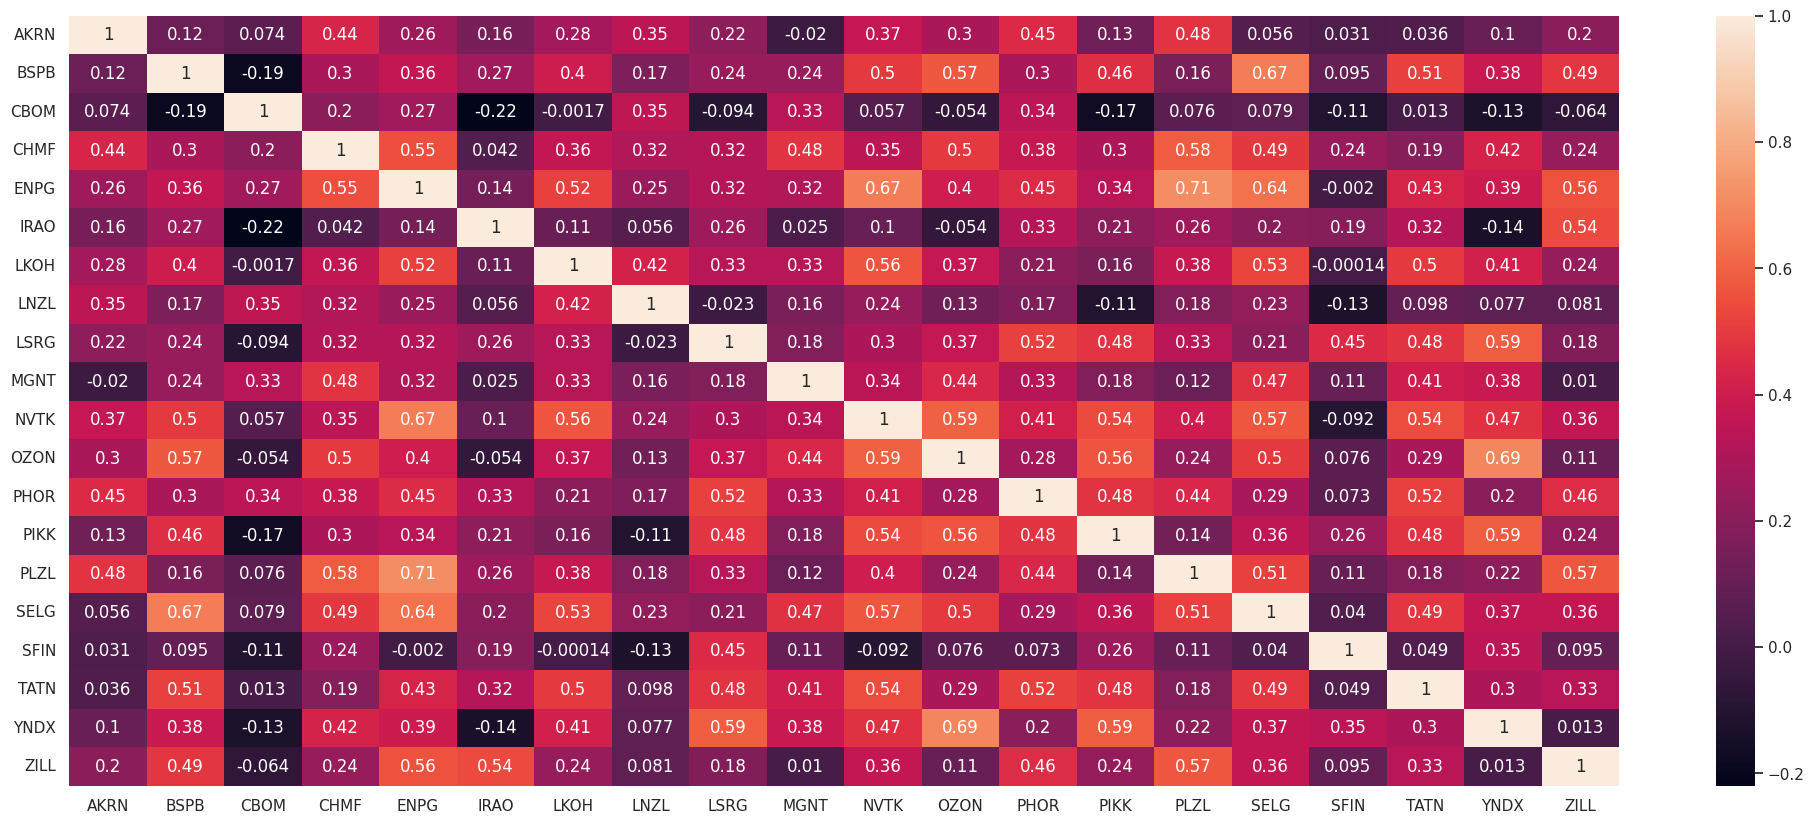

In [23]:
sns.heatmap(mean_m_returns.corr(), annot=True);
sns.set_theme(rc={'figure.figsize':(25,10)})

Аналитическое решение задачи нахождения портфеля максимальной доходности при заданном риске
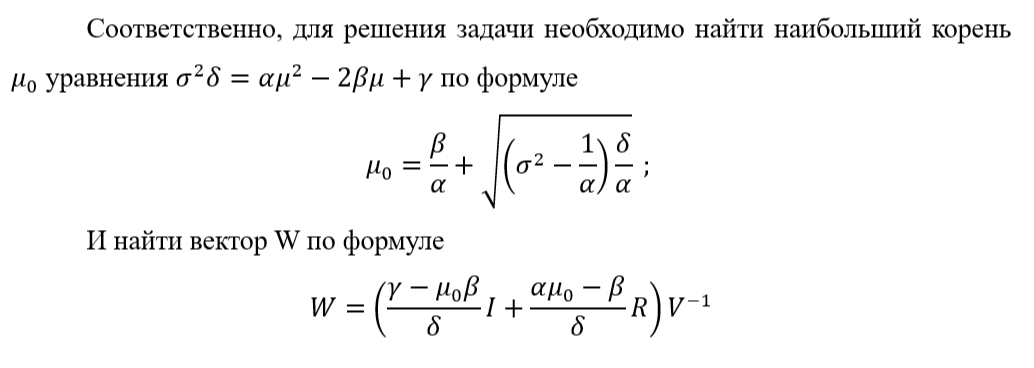
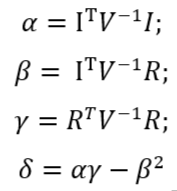


Создадим функцию, вычисляющую веса портфеля, по предполагаемым доходностям и заданному риску.

Посчитаем среднюю доходность каждой акции и ковариационную матрицу

In [24]:
mean_returns = mean_m_returns.mean()
cov_matrix = np.cov(mean_m_returns.T)
num_assets = mean_returns.shape[-1]

# заданный риск
set_risk=0.055

In [25]:
def Weights(returns, set_risk=set_risk, cov_matrix=cov_matrix):
  num = len(returns)
  if np.isnan(cov_matrix).any().any():
    return np.zeros(num)
  # обратная матрица ковариаций доходностей активов
  V_inv = np.linalg.inv(cov_matrix)
  # вектор столбец I, состоящий из n единиц
  I = np.ones(num)

  alpha = I.T@V_inv@I
  beta = I.T@V_inv@returns
  gamma = returns.T@V_inv@returns
  delta = alpha*gamma - beta*beta
  if set_risk**2 >= 1/alpha:
    mu0 = beta/alpha + np.sqrt((set_risk**2 - 1/alpha)*delta/alpha)
  else:
    print("Необходимо увеличить значение риска")

  # итоговые веса
  W = V_inv.dot((gamma-beta*mu0)/delta*I + (alpha*mu0-beta)/delta*returns)
  return W

In [26]:
W = Weights(mean_returns, set_risk, cov_matrix)
print(f"Веса портфеля максимальной доходности при риске {set_risk}: {W}")

Веса портфеля максимальной доходности при риске 0.055: [-0.60651238  0.69656991  0.94399751 -0.02250092 -0.50956141  0.55303535
  0.2358844  -0.10674044 -0.15037965 -0.10697524  0.12044341  0.076847
 -0.64383487  0.02480913  0.95472631 -0.69664226 -0.00226459  0.28343783
  0.27542713 -0.31976622]


Используем метод Монте-Карло для моделирования различных комбинаций активов и нахождения оптимального распределения.

In [27]:
# функция, создающая рандомные веса для каждого актива, которые в сумме дают 1
def PortfWeights(num):
  while True:
    weights = np.random.random(num) * 2 - 1 # веса в промежутке от -1 до 1
    weights = weights/sum(weights)
    if (abs(weights) > 1).any():
      continue
    break
  return weights

w = PortfWeights(num_assets)
print('Веса портфеля:',w)
print('Сумма весов:',w.sum())

# функция, расчитывающая доходность портфеля
def PortfReturn(weights, returns):
  return np.sum(weights*returns)

profit = PortfReturn(w, mean_returns)
print('Доходность портфеля: ',profit)

# функция, расчитывающая риск портфеля
def PortfRisk(weights, cov_m):
  return np.sqrt(weights.T@cov_m@weights)

risk = PortfRisk(w, cov_matrix)
print('Риск портфеля: ',risk)

Веса портфеля: [ 0.20197835  0.03091211  0.18621566 -0.06078272  0.31639963 -0.05348978
  0.11630255  0.28131971 -0.25178955 -0.31241058  0.08526226 -0.22837471
  0.17952337 -0.00747057 -0.04479791  0.22019362  0.20102354 -0.00440749
  0.27360932 -0.1292168 ]
Сумма весов: 1.0000000000000002
Доходность портфеля:  0.007364056728805128
Риск портфеля:  0.07414095131638206


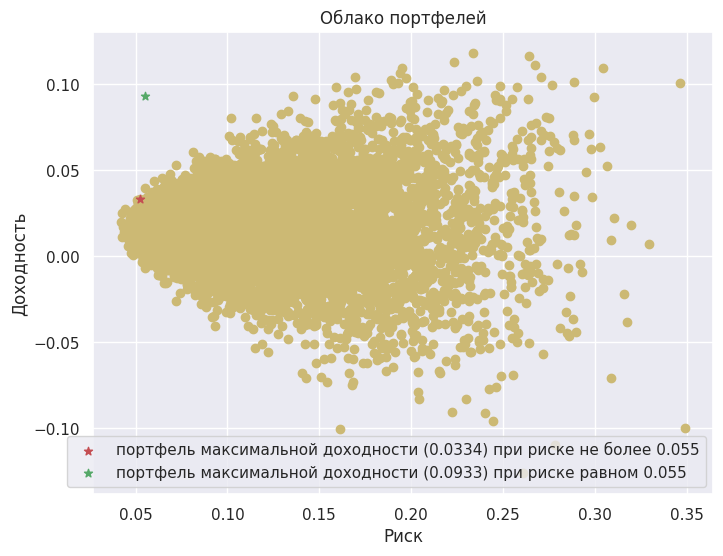

In [28]:
n = 10000 # количество портфелей
portf_profits = np.zeros(n)
portf_risks = np.zeros(n)
portf_weights = np.zeros((n, num_assets))
for i in range(n):
    weights = PortfWeights(num_assets)
    portf_weights[i, :] = weights
    portf_profits[i] = PortfReturn(weights, mean_returns)
    portf_risks[i] = PortfRisk(weights, cov_matrix)

# нарисуем построенные портфели на графике риск-доходность
plt.figure(figsize=(8,6))
plt.scatter(portf_risks,portf_profits,c='y')
plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title("Облако портфелей")

# найдем индекс портфеля с максимальной доходностью при заданном риске
mask = portf_risks <= set_risk
suitable_portf = np.where(mask, portf_profits, 0)
max_profit = np.argmax(suitable_portf)
plt.scatter([portf_risks[max_profit]],[portf_profits[max_profit]],c='r',marker='*',label=f'портфель максимальной доходности ({portf_profits[max_profit]:.4f}) при риске не более {set_risk}')

# нарисуем аналитически найденное решение
max_return = PortfReturn(W, mean_returns)
an_risk = PortfRisk(W, cov_matrix)
plt.scatter(an_risk, max_return, c='g', marker="*", label=f'портфель максимальной доходности ({max_return:.4f}) при риске равном {set_risk}')

plt.legend(loc='lower right')
plt.show()

Попробуем расчитать веса по методу Монте-Карло

In [31]:
cov_matrix22 = m_returns[34::22].cov()
set_risk = 0.07
def Markovitz_weights(returns, set_risk=set_risk, cov_matrix=cov_matrix22):
  n = 4000
  num = len(returns)
  portf_profits = np.zeros(n)
  portf_risks = np.zeros(n)
  portf_weights = np.zeros((n, num))
  for i in range(n):
    weights = PortfWeights(num)
    portf_weights[i, :] = weights
    portf_profits[i] = PortfReturn(weights, returns)
    portf_risks[i] = PortfRisk(weights, cov_matrix)

  # найдем индекс портфеля с максимальной доходностью при заданном риске
  mask = portf_risks <= set_risk
  suitable_portf = np.where(mask, portf_profits, 0)
  max_profit = np.argmax(suitable_portf)

  return portf_weights[max_profit]

In [ ]:
start = time.time()
w_m = np.empty(d_returns.shape)
for i in range(len(d_returns)):
  w_m[i] = Markovitz_weights(m_returns.iloc[i+1])
end = time.time()
print('Затраченное время:', end-start)

Затраченное время: 1463.208176612854


In [ ]:
mark_time = end-start
mark_time/60

24.38680294354757

In [32]:
start2 = time.time()
proportions = np.empty(d_returns.shape)
for i in range(len(d_returns)):
  proportions[i] = Weights(m_returns.iloc[i+1])
end2 = time.time()
eq_time = end2-start2
print('Затраченное время:', eq_time)

Затраченное время: 0.3959033489227295


In [ ]:
print(f"Аналитическое решение ускоряет процесс вычисления целевых значений в {mark_time/eq_time} раз")

Аналитическое решение ускоряет процесс вычисления целевых значений в 3439.7711362868245 раз


Перейдем к построению нейронной сети LSTM

In [34]:
num_train_samples = int(0.6 * d_returns.shape[0]) # обучающий набор данных 50%
num_val_samples = int(0.15 * d_returns.shape[0])  # валидационный набор 25%
num_test_samples = d_returns.shape[0] - num_train_samples - num_val_samples # тестовый набор 25%
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 456
num_val_samples: 114
num_test_samples: 190


Используем `timeseries_dataset_from_array()` для создания трех наборов данных (объектов `BatchDataset`) – для обучения, для валидации и для тестирования со следующими значениями параметров:

* `sample_rate = 1` — наблюдения будут производиться каждый день;
* `sequence_length=66` — наблюдения будут браться за квартал (около 66 рабочих дней);

* `delay=period` — целью для входной последовательности будут веса активов, расчитанные по формуле по реальным доходностям за следующий после наблюдений месяц;

При создании набора обучающих данных передадим в функцию аргементы `start_index = 0` и `end_index = num_train_samples`, чтобы использовать только первые 50% данных. Для набора данных валидации передадим в функцию `start_index = num_train_samples` и `end_index = num_train_samples + num_val_samples`, чтобы использовать следующие 25% данных. Наконец, для тестового набора данных передадим `start_index=num_train_samples+num_val_samples`, чтобы использовать оставшиеся данные.

In [35]:
sampling_rate = 1
sequence_length = 66
delay = sequence_length + period
batch_size = 32

In [36]:
data = d_returns.to_numpy()

In [37]:
train_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data[:-delay],
    targets=proportions[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data[:-delay],
    targets=proportions[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = tf.keras.utils.timeseries_dataset_from_array(
    data[:-delay],
    targets=proportions[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [38]:
for samples, targets in test_dataset:
    print("Форма признаков:", samples.shape)
    print("Форма откликов:", targets.shape)

Форма признаков: (32, 66, 20)
Форма откликов: (32, 20)
Форма признаков: (5, 66, 20)
Форма откликов: (5, 20)


In [39]:
inputs = tf.keras.Input(shape=(sequence_length, num_assets))
x = tf.keras.layers.LSTM(64, return_sequences=True)(inputs)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.LSTM(32)(x)
x = tf.keras.layers.Dense(num_assets, activation='softmax')(x)
outputs = tf.keras.layers.Dense(num_assets, activation='tanh')(x)

model_lstm = tf.keras.Model(inputs, outputs)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='auto')

model_lstm.compile(optimizer="Adam", loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
history = model_lstm.fit(train_dataset,
                    epochs=30,
                    validation_data=val_dataset,
                    callbacks=[callback]
                   )

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.1475 - mean_absolute_error: 0.2923 - root_mean_squared_error: 0.3840 - val_loss: 0.1659 - val_mean_absolute_error: 0.3184 - val_root_mean_squared_error: 0.4073
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.1391 - mean_absolute_error: 0.2837 - root_mean_squared_error: 0.3729 - val_loss: 0.1433 - val_mean_absolute_error: 0.2979 - val_root_mean_squared_error: 0.3786
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.1278 - mean_absolute_error: 0.2730 - root_mean_squared_error: 0.3574 - val_loss: 0.1307 - val_mean_absolute_error: 0.2832 - val_root_mean_squared_error: 0.3615
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.1228 - mean_absolute_error: 0.2673 - root_mean_squared_error: 0.3503 - val_loss: 0.1227 - val_mean_absolute_error: 0.2734 - val_root_mean_squared_error: 0.3503
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.1196 - mean_absolute_error: 0.2642 - root_mean_squar

In [40]:
model_lstm.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 66, 64)         │        21,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 66, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,770 (413.17 KB)

 Trainable params: 35,256 (137.72 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 70,514 (275.45 KB)

In [41]:
print(f"Значения метрик на тестовом наборе: {model_lstm.evaluate(test_dataset)[1:]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1080 - mean_absolute_error: 0.2523 - root_mean_squared_error: 0.3286
Значения метрик на тестовом наборе: [0.32925063371658325, 0.25380754470825195]


In [42]:
loss_lstm = np.true_divide(history.history["root_mean_squared_error"], history.history["root_mean_squared_error"][0])
val_loss_lstm = np.true_divide(history.history["val_root_mean_squared_error"], history.history["val_root_mean_squared_error"][0])

In [43]:
testPredict = model_lstm.predict(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step


Модель GRU

In [44]:
inputs = tf.keras.Input(shape=(sequence_length, num_assets))
x = tf.keras.layers.GRU(64, return_sequences=True)(inputs)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.GRU(32)(x)
x = tf.keras.layers.Dense(num_assets, activation='softmax')(x)
outputs = tf.keras.layers.Dense(num_assets, activation='tanh')(x)

model_gru = tf.keras.Model(inputs, outputs)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='auto')

model_gru.compile(optimizer="Adam", loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
history_gru = model_gru.fit(train_dataset,
                    epochs=30,
                    validation_data=val_dataset,
                    callbacks=[callback]
                   )

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 203ms/step - loss: 0.1600 - mean_absolute_error: 0.3042 - root_mean_squared_error: 0.3999 - val_loss: 0.1798 - val_mean_absolute_error: 0.3295 - val_root_mean_squared_error: 0.4241
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.1527 - mean_absolute_error: 0.2961 - root_mean_squared_error: 0.3907 - val_loss: 0.1685 - val_mean_absolute_error: 0.3169 - val_root_mean_squared_error: 0.4105
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.1453 - mean_absolute_error: 0.2882 - root_mean_squared_error: 0.3812 - val_loss: 0.1524 - val_mean_absolute_error: 0.2999 - val_root_mean_squared_error: 0.3904
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.1371 - mean_absolute_error: 0.2819 - root_mean_squared_error: 0.3702 - val_loss: 0.1385 - val_mean_absolute_error: 0.2865 - val_root_mean_squared_error: 0.3721
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.1323 - mean_absolute_error: 0.2786 - root_mean_squared

In [45]:
model_gru.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 66, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 66, 64)         │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 66, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,002 (316.42 KB)

 Trainable params: 27,000 (105.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,002 (210.95 KB)

In [46]:
loss_gru = np.true_divide(history_gru.history["root_mean_squared_error"], history_gru.history["root_mean_squared_error"][0])
val_loss_gru = np.true_divide(history_gru.history["val_root_mean_squared_error"], history_gru.history["val_root_mean_squared_error"][0])

In [47]:
print(f"Значения метрик на тестовом наборе: {model_gru.evaluate(test_dataset)[1:]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1079 - mean_absolute_error: 0.2527 - root_mean_squared_error: 0.3286
Значения метрик на тестовом наборе: [0.3292190432548523, 0.2541729509830475]


In [48]:
testPredict_gru = model_gru.predict(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step


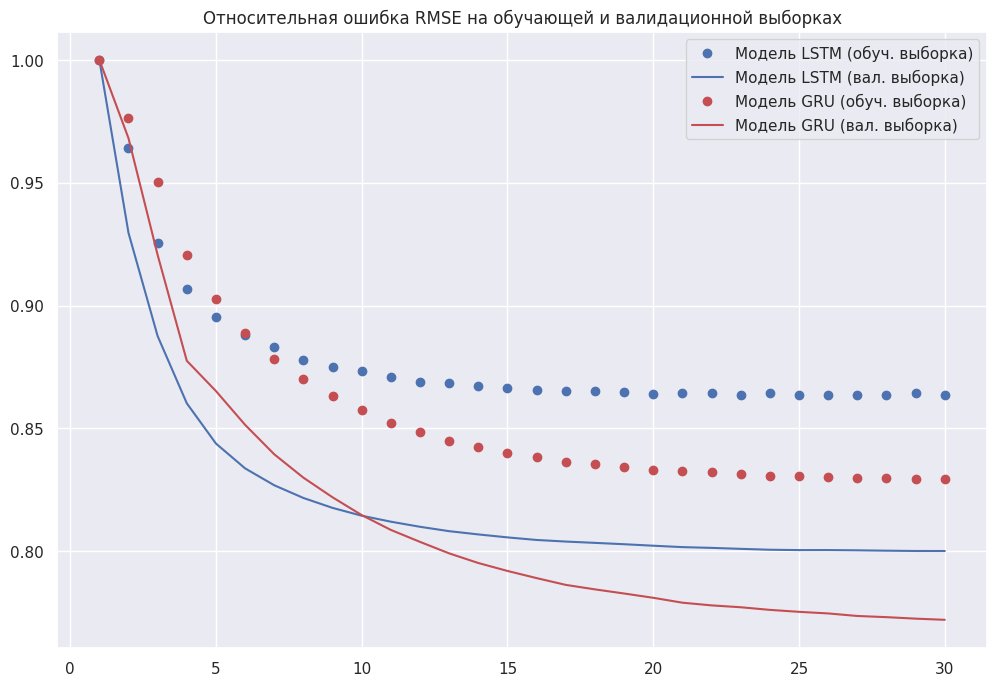

In [64]:
epochs = range(1, len(val_loss_lstm) + 1)
plt.figure(figsize=(12,8))
plt.plot(epochs, loss_lstm, "bo", label="Модель LSTM (обуч. выборка)")
plt.plot(epochs, val_loss_lstm, "b", label="Модель LSTM (вал. выборка)")
plt.plot(epochs, loss_gru, "ro", label="Модель GRU (обуч. выборка)")
plt.plot(epochs, val_loss_gru, "r", label="Модель GRU (вал. выборка)")
plt.title("Относительная ошибка RMSE на обучающей и валидационной выборках")
plt.legend();

Целевые значения долей активов и значения, полученные нейронными сетями.

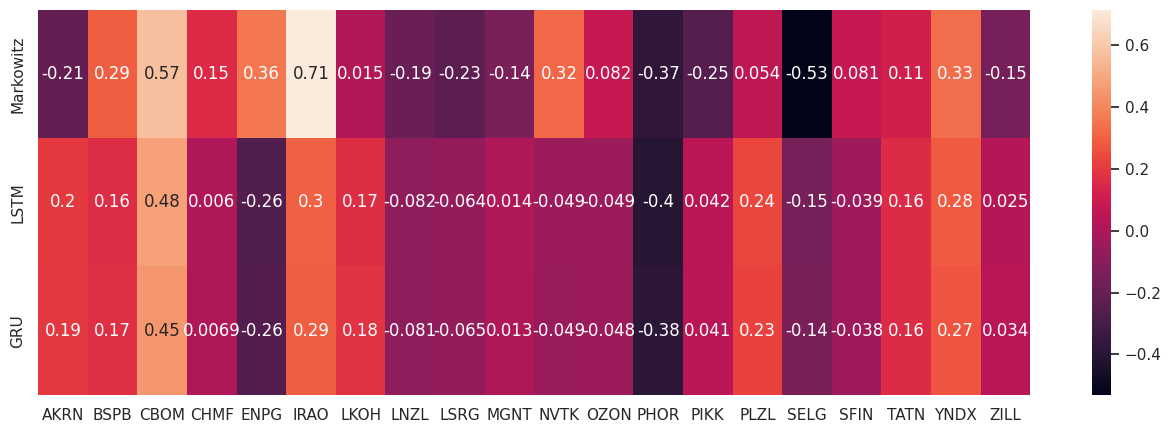

In [53]:
vis_wei = pd.DataFrame([proportions[-15], testPredict[-15], testPredict_gru[-15]], columns=d_returns.columns, index=['Markowitz', 'LSTM', 'GRU'])
sns.heatmap(vis_wei, annot=True);
sns.set_theme(rc={'figure.figsize':(16,5)})

Сравним доходность наших портфелей с доходностью индекса Московской биржи.

In [50]:
imoex = moex.get_board_history(requests.Session(), 'MOEX', start='2022-04-01', end='2025-03-31', board='TQBR')
df_moex = pd.DataFrame(imoex)
df_moex = df_moex[['TRADEDATE','CLOSE']]
df_moex = df_moex.rename(columns={'CLOSE': 'MOEX'})
df_moex.index = pd.to_datetime(df_moex.TRADEDATE)
df_moex.drop('TRADEDATE', axis=1, inplace=True)
df_moex

,MOEX
TRADEDATE,
2022-04-01,111.45
2022-04-04,111.07
2022-04-05,103.65
2022-04-06,102.05
2022-04-07,103.18
...,...
2025-03-25,210.56
2025-03-26,207.53
2025-03-27,202.40


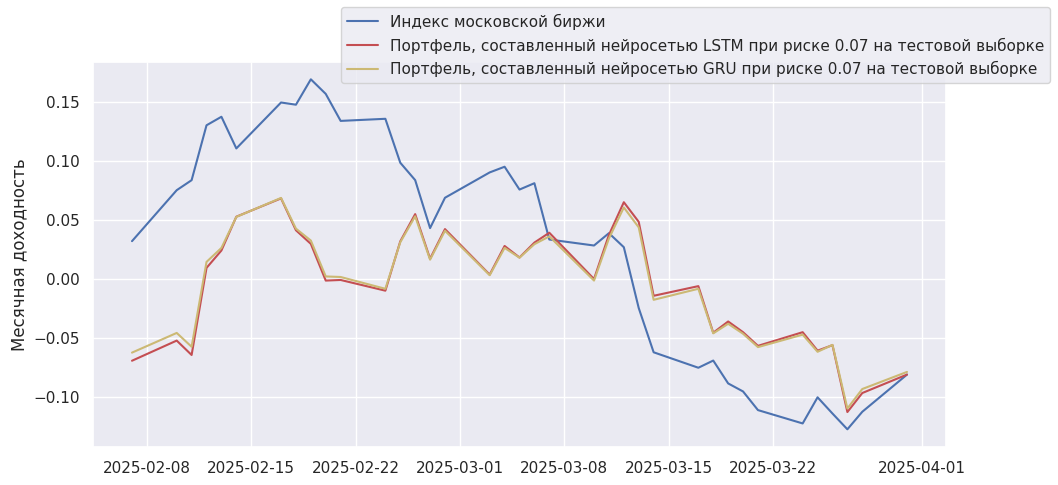

In [51]:
returns_moex = df_moex.pct_change(periods=period)

lstm_returns = (testPredict*m_returns.iloc[-testPredict.shape[0]:]).sum(axis=1)
gru_returns = (testPredict_gru*m_returns.iloc[-testPredict_gru.shape[0]:]).sum(axis=1)

fig, ax = plt.subplots(figsize=(11,5))
plt.plot(returns_moex[-testPredict.shape[0]:], label='Индекс московской биржи')
plt.plot(lstm_returns, color='r', label=f'Портфель, составленный нейросетью LSTM при риске {set_risk} на тестовой выборке')
plt.plot(gru_returns, color='y', label=f'Портфель, составленный нейросетью GRU при риске {set_risk} на тестовой выборке')
plt.ylabel('Месячная доходность')
plt.plot()
fig.legend()
plt.show();

Попробуем использовать получившиеся модели для торговли в течении 2 лет

In [54]:
months = 24
cur_index = len(d_returns) - period*months - 1
cur_index

231

In [55]:
profit = 0
weights = np.zeros((months, num_assets))
accum_profit = np.zeros(months)
m_ret = np.zeros(months)
for day in range(cur_index, len(d_returns)-period, period):
  t_dataset = tf.keras.utils.timeseries_dataset_from_array(
    d_returns[day-sequence_length:day].to_numpy(),
    targets=proportions[day+period],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    batch_size=batch_size)
  prediction = model_lstm.predict(t_dataset)
  i = int((day - cur_index)/period)
  weights[i] = prediction
  profitability = prediction*m_returns.iloc[day+period+1].to_numpy()
  m_ret[i] = sum(profitability[0])
  profit += m_ret[i]
  accum_profit[i] = profit
print(profit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
0.8649702000328825


In [56]:
profit_gru = 0
weights_gru = np.zeros((months, num_assets))
accum_profit_gru = np.zeros(months)
m_ret_gru = np.zeros(months)
for day in range(cur_index, len(d_returns)-period, period):
  t_dataset = tf.keras.utils.timeseries_dataset_from_array(
    d_returns[day-sequence_length:day].to_numpy(),
    targets=proportions[day+period],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    batch_size=batch_size)
  prediction = model_gru.predict(t_dataset)
  i = int((day - cur_index)/period)
  weights_gru[i] = prediction
  profitability_gru = prediction*m_returns.iloc[day+period+1].to_numpy()
  m_ret_gru[i] = sum(profitability_gru[0])
  profit_gru += m_ret_gru[i]
  accum_profit_gru[i] = profit_gru

print(profit_gru)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
0.8662570838475413


In [60]:
real_returns = m_returns.iloc[34::period]
mark_returns = []
mark_weights = []
for i in range(months, 0, -1):
  mean_returns = real_returns.iloc[:-i].mean()
  cov_mat = np.cov(real_returns.iloc[:-i].T)
  mark_weights.append(Markovitz_weights(mean_returns, cov_matrix=cov_mat))
  mark_returns.append(sum(Markovitz_weights(mean_returns, cov_matrix=cov_mat)*real_returns.iloc[-i]))
cum_mark_return = np.cumsum(mark_returns)

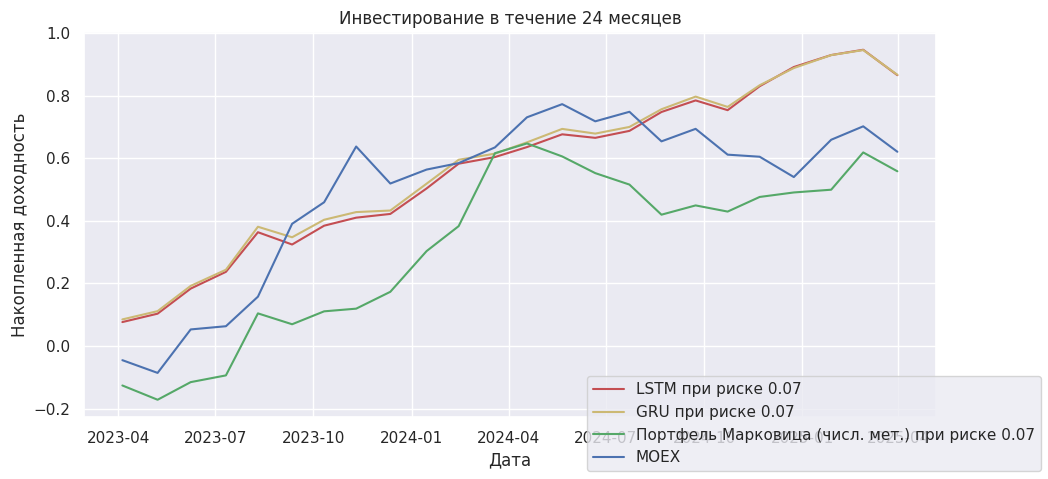

In [61]:
moex_ret = df_moex.pct_change(periods=period)[-period*months+period-1::period]
moex_cum_ret = moex_ret.cumsum()
x = moex_ret.index
fig, ax = plt.subplots(figsize=(11,5))
plt.plot(x, accum_profit, color='r', label=f'LSTM при риске {set_risk} ')
plt.plot(x, accum_profit_gru, color='y', label=f'GRU при риске {set_risk}')
plt.plot(x, cum_mark_return, color='g', label=f'Портфель Марковица (числ. мет.) при риске {set_risk}')
plt.plot(moex_cum_ret, label='MOEX')
plt.xlabel('Дата')
plt.ylabel('Накопленная доходность')
plt.title(f'Инвестирование в течение {months} месяцев')
fig.legend(loc='lower right')
plt.show();